In [1]:
# Import libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Load libraries
Bank_data = pd.read_csv("https://raw.githubusercontent.com/PraneethaRajupalepu/Bank-DataScience-Project/main/bank-full-cleaned.csv")
Bank_data.info()
Bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
Bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
Bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Check for missing values and duplicates
print(Bank_data.isnull().sum())
print(Bank_data.duplicated().any())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False


In [6]:
# Check for unique values
Bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
# Mapping yes and no values to binary values
Bank_data['default'] = Bank_data['default'].map({'yes': 1, 'no': 0})
Bank_data['housing'] = Bank_data['housing'].map({'yes': 1, 'no':0})
Bank_data['loan'] = Bank_data['loan'].map({'yes': 1, 'no': 0})
Bank_data['y'] = Bank_data['y'].map({'yes': 1, 'no':0})

In [8]:
# Check changes in data
Bank_data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10668,59,services,married,primary,0,31,0,0,unknown,16,jun,41,3,-1,0,unknown,0
38565,40,services,single,secondary,0,65,1,0,cellular,15,may,15,3,-1,0,unknown,0
1870,47,management,divorced,tertiary,0,266,1,0,unknown,9,may,128,1,-1,0,unknown,0
9155,39,services,married,secondary,0,0,1,0,unknown,5,jun,620,2,-1,0,unknown,0
28541,30,technician,single,secondary,0,0,0,0,cellular,29,jan,624,2,-1,0,unknown,0


In [9]:
# Remove unknown values form dataset
Bank_data.drop(Bank_data[Bank_data['job'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['marital'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['education'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['default'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['housing'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['loan'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['contact'] == 'unknown'].index, inplace=True)
Bank_data.drop(Bank_data[Bank_data['poutcome'] == 'unknown'].index, inplace=True)

In [10]:
# check changes in data
Bank_data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43663,46,management,married,tertiary,0,273,1,0,cellular,10,may,583,6,53,6,success,1
36363,48,blue-collar,married,primary,0,643,1,0,cellular,11,may,66,4,173,7,other,0
41584,48,management,married,tertiary,0,2,0,0,cellular,15,sep,103,1,91,2,failure,0
45178,34,blue-collar,married,secondary,0,320,1,0,cellular,12,nov,413,1,92,3,success,1
31847,26,blue-collar,married,secondary,0,352,1,0,cellular,8,apr,213,3,317,4,other,0


In [11]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 10)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [12]:
continuous, categorical = [], []
rev_list = ['housing', 'loan', 'default']

for col in [c for c in Bank_data.columns if c not in rev_list and c != 'y']:
    if is_numeric_dtype(Bank_data[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [13]:
continuous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
categorical

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Exploratory Data Analysis


In [15]:
n = len(Bank_data)
n_not_subscribed = sum(Bank_data['y'])
n_subscribed = n - n_not_subscribed

print('Dataset contains %d records' % (n))
print('Number of customers who subscribed to a term deposit: %d (%0.2f%%)' % (n_subscribed, n_subscribed*100/n))

Dataset contains 7842 records
Number of customers who subscribed to a term deposit: 6056 (77.23%)


<AxesSubplot:>

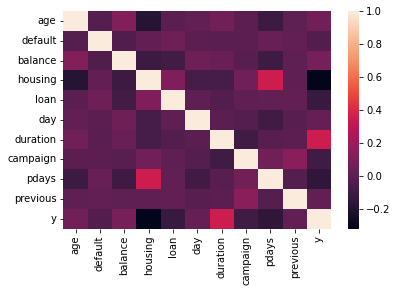

In [16]:
# Correlation matrix
sns.heatmap(Bank_data.corr())

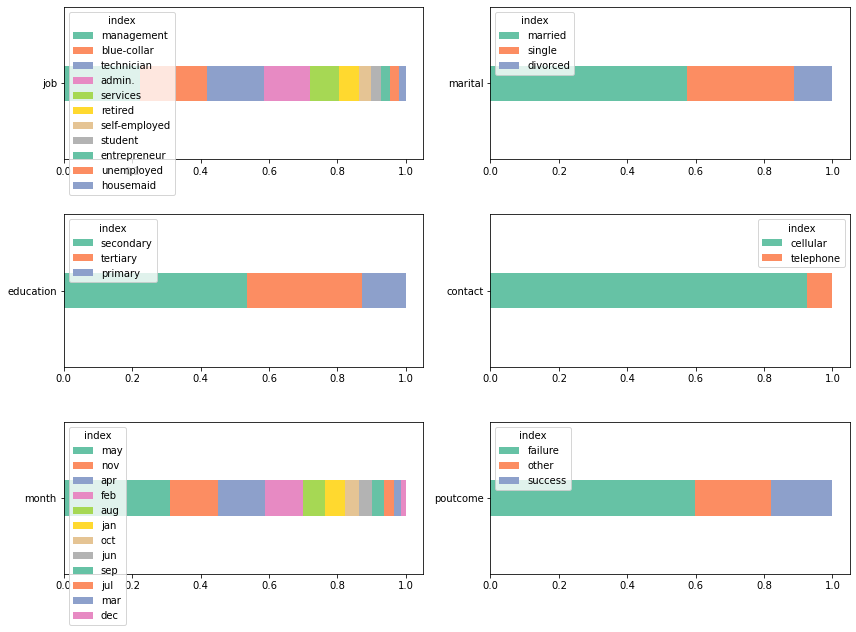

In [17]:
multiple_eda_categorical(Bank_data, categorical)

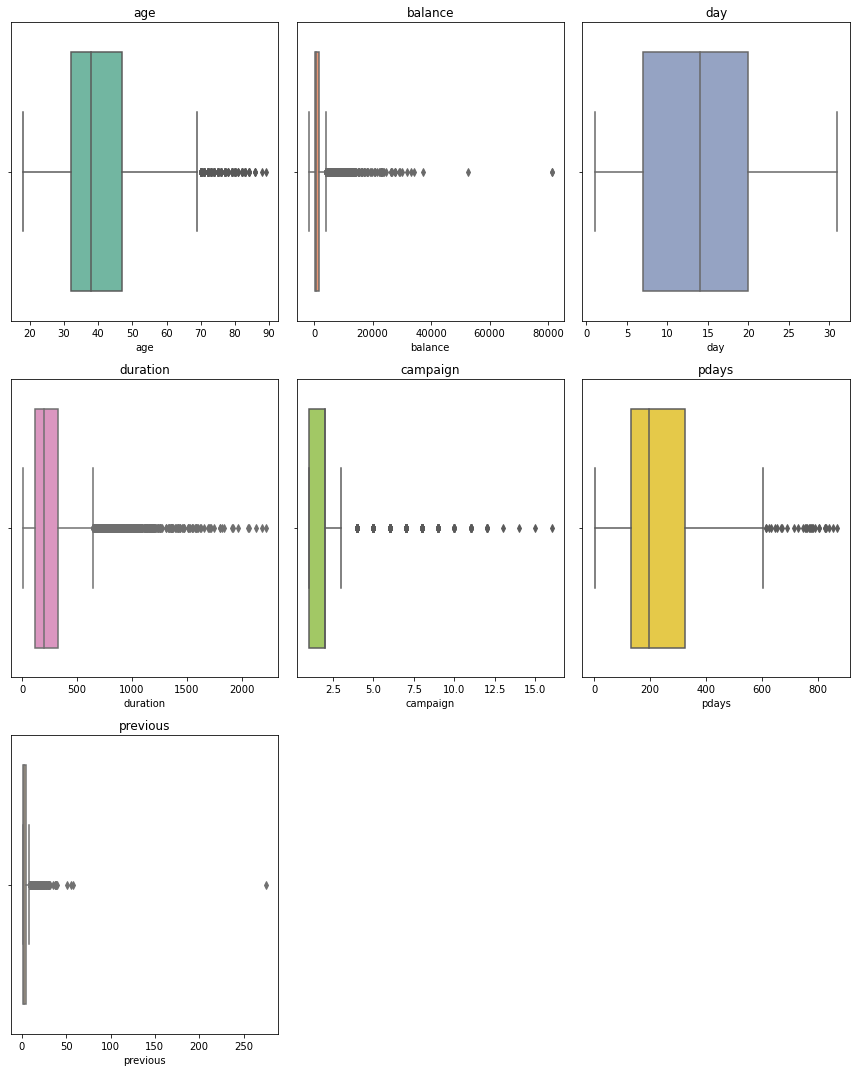

In [18]:
multiple_eda_continuous(Bank_data, continuous)

<AxesSubplot:xlabel='age', ylabel='Count'>

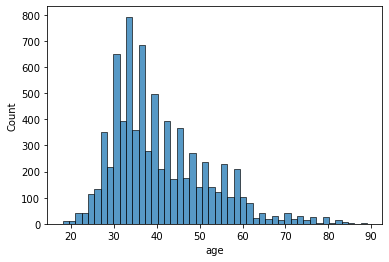

In [19]:
sns.histplot(data=Bank_data, x="age")

<AxesSubplot:xlabel='duration', ylabel='Count'>

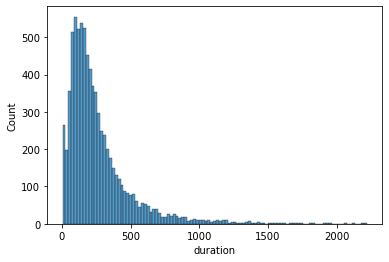

In [20]:
sns.histplot(data=Bank_data, x="duration")

<AxesSubplot:xlabel='day', ylabel='Count'>

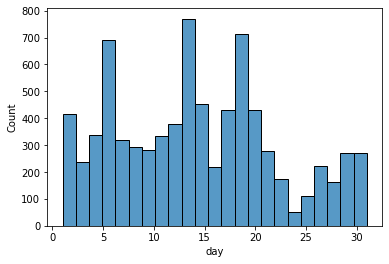

In [21]:
sns.histplot(data=Bank_data, x="day")

<AxesSubplot:xlabel='balance', ylabel='Count'>

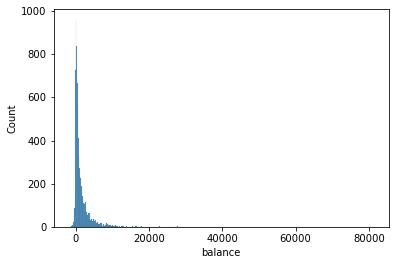

In [22]:
sns.histplot(data=Bank_data, x="balance")

<AxesSubplot:xlabel='campaign', ylabel='Count'>

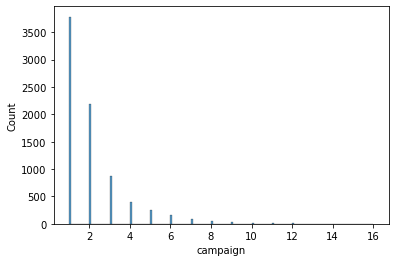

In [23]:
sns.histplot(data=Bank_data, x="campaign")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

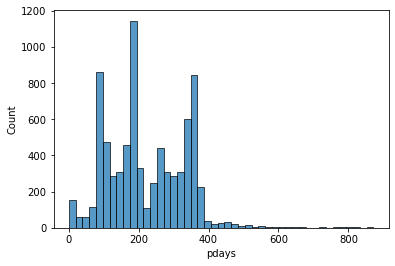

In [24]:
sns.histplot(data=Bank_data, x="pdays")

<AxesSubplot:xlabel='previous', ylabel='Count'>

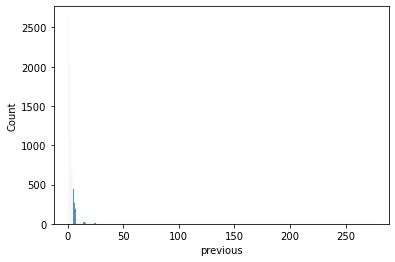

In [25]:
sns.histplot(data=Bank_data, x="previous")

In [26]:
# Check skewness and kurtosis
for i in continuous:
    print(f'skewness {i}:'+ str (Bank_data[i].skew()))
    print(f'kurtosis {i}:' + str(Bank_data[i].kurtosis()))

skewness age:0.9747082043261773
kurtosis age:0.8694296964957875
skewness balance:8.242971710564701
kurtosis balance:142.5624074679466
skewness day:0.27183789389161533
kurtosis day:-0.7526105915848023
skewness duration:2.568750083940156
kurtosis duration:9.838210597099438
skewness campaign:2.425745441069692
kurtosis campaign:8.164170979866501
skewness pdays:0.5140567581221176
kurtosis pdays:0.8637858517059698
skewness previous:27.995396489469243
kurtosis previous:1546.6843363005069


# Suggested method for dealing with outliers

In [27]:
# Method 1
# IQR score
Q1 = Bank_data.quantile(0.25)
Q3 = Bank_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Bank_data_out = Bank_data[~((Bank_data < (Q1 - 1.5 * IQR)) |(Bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Bank_data_out.shape)

age           15.00
default        0.00
balance     1571.75
housing        1.00
loan           0.00
day           13.00
duration     211.00
campaign       1.00
pdays        193.00
previous       3.00
y              0.00
dtype: float64
(3546, 17)


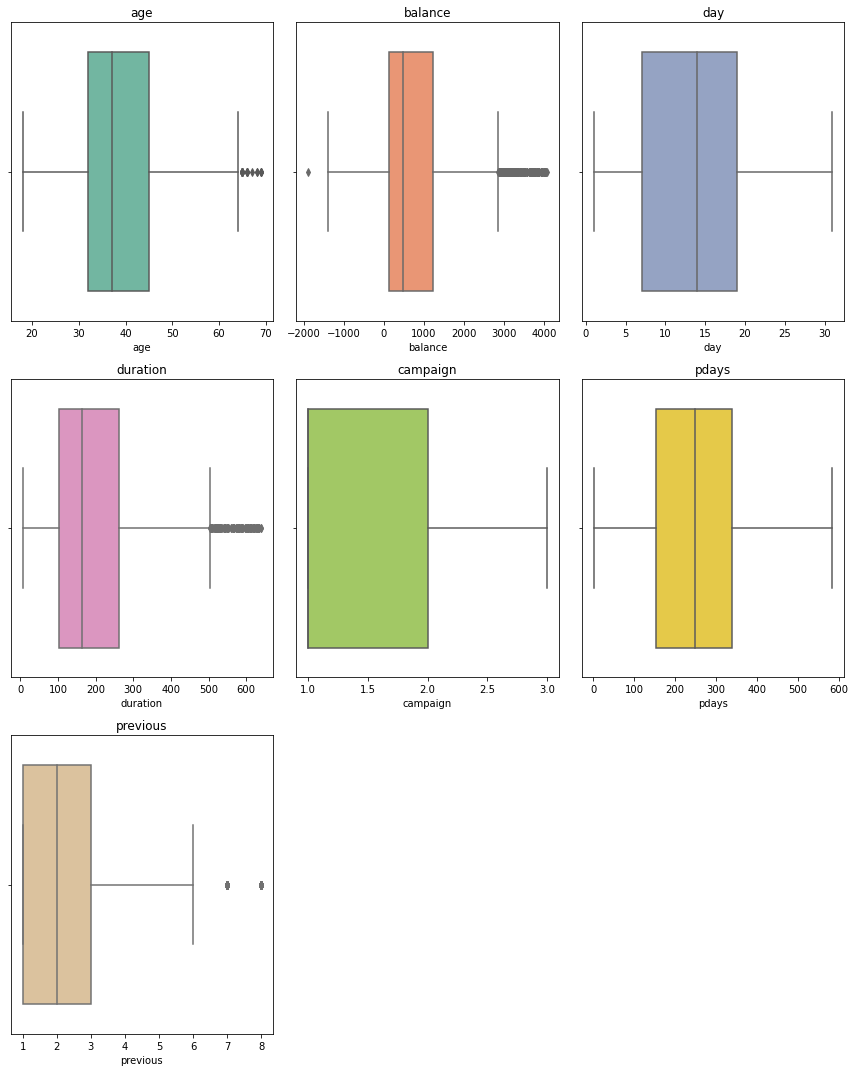

In [28]:
# Check outliers after flooring and capping using IQR
multiple_eda_continuous(Bank_data_out, continuous)

In [29]:
# Compare skewness and kurtosis after transforming dataset with method 1
for i in continuous:
    print(f'skewness {i}:'+ str (Bank_data[i].skew()))
    print(f'skewness {i}:'+ str (Bank_data_out[i].skew()))
    print(f'kurtosis {i}:' + str(Bank_data[i].kurtosis()))
    print(f'kurtosis {i}:' + str(Bank_data_out[i].kurtosis()))
    

skewness age:0.9747082043261773
skewness age:0.6429853112283354
kurtosis age:0.8694296964957875
kurtosis age:-0.24725334334824645
skewness balance:8.242971710564701
skewness balance:1.3908891924398807
kurtosis balance:142.5624074679466
kurtosis balance:1.4868974582684342
skewness day:0.27183789389161533
skewness day:0.3055582205684306
kurtosis day:-0.7526105915848023
kurtosis day:-0.664792213000633
skewness duration:2.568750083940156
skewness duration:1.1429893053618163
kurtosis duration:9.838210597099438
kurtosis duration:0.9095776720171593
skewness campaign:2.425745441069692
skewness campaign:0.8460591466713917
kurtosis campaign:8.164170979866501
kurtosis campaign:-0.5236456981288087
skewness pdays:0.5140567581221176
skewness pdays:-0.187196727356706
kurtosis pdays:0.8637858517059698
kurtosis pdays:-0.9619501670385477
skewness previous:27.995396489469243
skewness previous:1.4651016614098398
kurtosis previous:1546.6843363005069
kurtosis previous:1.8050729619914372


In [30]:
# Method 2
# Binning
Bank_data1 = Bank_data.copy()

# Bin age 
bin_age = ['19-30','31-40','41-50','51-60','60+']
cut_bins = [19,31,41,51,61,87]
Bank_data1['Age group'] = pd.cut(Bank_data['age'], bins=cut_bins, labels=bin_age, include_lowest=True)
                               
# Bin balance
bin_balance = ['Very low','Low','Medium','High']
cut_bins_balance = [-3313,70,445,1481,71188]
Bank_data1['Balance group'] = pd.cut(Bank_data['balance'], bins=cut_bins_balance, labels=bin_balance, include_lowest=True)

# Bin duration
bin_duration = ['short','medium','long']
cut_bins_duration = [4,186,330,3025]
Bank_data1['Duration group'] = pd.cut(Bank_data['duration'], bins=cut_bins_duration, labels=bin_duration, include_lowest=True)

# Bin campaign
bin_campaign = ['1-10','11-20','20+']
cut_bins_campaign = [1,11,21,50]
Bank_data1['Campaign length'] = pd.cut(Bank_data['campaign'], bins=cut_bins_campaign, labels=bin_campaign, include_lowest=True)

Bank_data1.drop(['age', 'balance', 'duration', 'campaign'], axis=1, inplace=True)

In [31]:
Bank_data1.sample(10)

,job,marital,education,default,housing,loan,contact,day,month,pdays,previous,poutcome,y,Age group,Balance group,Duration group,Campaign length
45056,management,married,tertiary,0,0,0,telephone,19,oct,137,11,other,1,60+,High,long,1-10
41743,admin.,married,secondary,0,0,0,cellular,9,oct,184,1,success,1,19-30,High,medium,1-10
34039,self-employed,single,tertiary,0,0,0,cellular,30,apr,84,1,failure,0,31-40,Low,short,1-10
40377,admin.,divorced,secondary,0,1,1,cellular,23,jun,89,1,failure,0,41-50,Very low,medium,1-10
43236,self-employed,divorced,tertiary,0,0,0,cellular,8,mar,585,6,other,0,41-50,High,short,1-10
40695,technician,married,secondary,0,0,0,cellular,7,aug,99,2,success,0,19-30,Medium,short,1-10
42420,admin.,single,secondary,0,0,0,cellular,4,dec,114,1,success,0,51-60,High,long,1-10
33968,management,married,tertiary,0,1,0,cellular,30,apr,13,1,failure,1,31-40,Low,long,1-10
43464,management,single,tertiary,0,0,0,cellular,13,apr,595,2,failure,1,31-40,Low,long,1-10
39767,technician,divorced,tertiary,0,1,0,cellular,1,jun,314,2,failure,0,31-40,High,short,1-10


In [32]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
month = list(Bank_data.month)
values = array(month)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
month_list = list(integer_encoded)
print(month_list)

[10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

In [34]:
Bank_data.insert(loc=11, column="Month_Enc", value = month_list)
Bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,10,39,1,151,3,failure,0
24062,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,10,519,1,166,1,other,1
24064,33,services,married,secondary,0,3444,1,0,telephone,21,oct,10,144,1,91,4,failure,1
24072,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,10,73,1,86,4,other,0
24077,36,management,married,tertiary,0,0,1,0,telephone,23,oct,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,9,1166,3,530,12,other,0
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,9,226,1,184,4,success,1
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,9,300,1,40,8,failure,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1


In [35]:
job = list(Bank_data.job)
values = array(job)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
job_list = list(integer_encoded)
Bank_data.insert(loc=2, column="job_enc", value = job_list)
Bank_data

,age,job,job_enc,marital,education,default,balance,housing,loan,contact,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,0,married,tertiary,0,882,0,0,telephone,21,oct,10,39,1,151,3,failure,0
24062,42,admin.,0,single,secondary,0,-247,1,1,telephone,21,oct,10,519,1,166,1,other,1
24064,33,services,7,married,secondary,0,3444,1,0,telephone,21,oct,10,144,1,91,4,failure,1
24072,36,management,4,married,tertiary,0,2415,1,0,telephone,22,oct,10,73,1,86,4,other,0
24077,36,management,4,married,tertiary,0,0,1,0,telephone,23,oct,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,1,single,secondary,0,1475,1,0,cellular,16,nov,9,1166,3,530,12,other,0
45201,53,management,4,married,tertiary,0,583,0,0,cellular,17,nov,9,226,1,184,4,success,1
45204,73,retired,5,married,secondary,0,2850,0,0,cellular,17,nov,9,300,1,40,8,failure,1
45208,72,retired,5,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1


In [36]:
marital = list(Bank_data.marital)
values = array(marital)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
marital_list = list(integer_encoded)
Bank_data.insert(loc=4, column="marital_enc", value = marital_list)
Bank_data

,age,job,job_enc,marital,marital_enc,education,default,balance,housing,loan,contact,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,0,married,1,tertiary,0,882,0,0,telephone,21,oct,10,39,1,151,3,failure,0
24062,42,admin.,0,single,2,secondary,0,-247,1,1,telephone,21,oct,10,519,1,166,1,other,1
24064,33,services,7,married,1,secondary,0,3444,1,0,telephone,21,oct,10,144,1,91,4,failure,1
24072,36,management,4,married,1,tertiary,0,2415,1,0,telephone,22,oct,10,73,1,86,4,other,0
24077,36,management,4,married,1,tertiary,0,0,1,0,telephone,23,oct,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,1,single,2,secondary,0,1475,1,0,cellular,16,nov,9,1166,3,530,12,other,0
45201,53,management,4,married,1,tertiary,0,583,0,0,cellular,17,nov,9,226,1,184,4,success,1
45204,73,retired,5,married,1,secondary,0,2850,0,0,cellular,17,nov,9,300,1,40,8,failure,1
45208,72,retired,5,married,1,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1


In [37]:
education = list(Bank_data.education)
values = array(education)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
education_list = list(integer_encoded)
Bank_data.insert(loc=6, column="Education_Enc", value = education_list)
Bank_data

,age,job,job_enc,marital,marital_enc,education,Education_Enc,default,balance,housing,...,contact,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,0,married,1,tertiary,2,0,882,0,...,telephone,21,oct,10,39,1,151,3,failure,0
24062,42,admin.,0,single,2,secondary,1,0,-247,1,...,telephone,21,oct,10,519,1,166,1,other,1
24064,33,services,7,married,1,secondary,1,0,3444,1,...,telephone,21,oct,10,144,1,91,4,failure,1
24072,36,management,4,married,1,tertiary,2,0,2415,1,...,telephone,22,oct,10,73,1,86,4,other,0
24077,36,management,4,married,1,tertiary,2,0,0,1,...,telephone,23,oct,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,1,single,2,secondary,1,0,1475,1,...,cellular,16,nov,9,1166,3,530,12,other,0
45201,53,management,4,married,1,tertiary,2,0,583,0,...,cellular,17,nov,9,226,1,184,4,success,1
45204,73,retired,5,married,1,secondary,1,0,2850,0,...,cellular,17,nov,9,300,1,40,8,failure,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,cellular,17,nov,9,1127,5,184,3,success,1


In [38]:
contact = list(Bank_data.contact)
values = array(contact)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
contact_list = list(integer_encoded)
Bank_data.insert(loc=12, column="Contact_Enc", value = contact_list)
Bank_data

,age,job,job_enc,marital,marital_enc,education,Education_Enc,default,balance,housing,...,Contact_Enc,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,0,married,1,tertiary,2,0,882,0,...,1,21,oct,10,39,1,151,3,failure,0
24062,42,admin.,0,single,2,secondary,1,0,-247,1,...,1,21,oct,10,519,1,166,1,other,1
24064,33,services,7,married,1,secondary,1,0,3444,1,...,1,21,oct,10,144,1,91,4,failure,1
24072,36,management,4,married,1,tertiary,2,0,2415,1,...,1,22,oct,10,73,1,86,4,other,0
24077,36,management,4,married,1,tertiary,2,0,0,1,...,1,23,oct,10,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,1,single,2,secondary,1,0,1475,1,...,0,16,nov,9,1166,3,530,12,other,0
45201,53,management,4,married,1,tertiary,2,0,583,0,...,0,17,nov,9,226,1,184,4,success,1
45204,73,retired,5,married,1,secondary,1,0,2850,0,...,0,17,nov,9,300,1,40,8,failure,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,0,17,nov,9,1127,5,184,3,success,1


In [39]:
poutcome = list(Bank_data.poutcome)
values = array(poutcome)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
poutcome_list = list(integer_encoded)
Bank_data.insert(loc=20, column="poutcome_Enc", value = poutcome_list)
Bank_data

,age,job,job_enc,marital,marital_enc,education,Education_Enc,default,balance,housing,...,day,month,Month_Enc,duration,campaign,pdays,previous,poutcome_Enc,poutcome,y
24060,33,admin.,0,married,1,tertiary,2,0,882,0,...,21,oct,10,39,1,151,3,0,failure,0
24062,42,admin.,0,single,2,secondary,1,0,-247,1,...,21,oct,10,519,1,166,1,1,other,1
24064,33,services,7,married,1,secondary,1,0,3444,1,...,21,oct,10,144,1,91,4,0,failure,1
24072,36,management,4,married,1,tertiary,2,0,2415,1,...,22,oct,10,73,1,86,4,1,other,0
24077,36,management,4,married,1,tertiary,2,0,0,1,...,23,oct,10,140,1,143,3,0,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,1,single,2,secondary,1,0,1475,1,...,16,nov,9,1166,3,530,12,1,other,0
45201,53,management,4,married,1,tertiary,2,0,583,0,...,17,nov,9,226,1,184,4,2,success,1
45204,73,retired,5,married,1,secondary,1,0,2850,0,...,17,nov,9,300,1,40,8,0,failure,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,17,nov,9,1127,5,184,3,2,success,1


In [40]:
Bank_data = Bank_data.drop(['job', 'marital', 'education', 'month', 'contact', 'poutcome'], axis = 1)

In [41]:
Bank_data

,age,job_enc,marital_enc,Education_Enc,default,balance,housing,loan,Contact_Enc,day,Month_Enc,duration,campaign,pdays,previous,poutcome_Enc,y
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1


In [42]:
Bank_data.columns

Index(['age', 'job_enc', 'marital_enc', 'Education_Enc', 'default', 'balance',
       'housing', 'loan', 'Contact_Enc', 'day', 'Month_Enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_Enc', 'y'],
      dtype='object')

In [43]:
columns=['age', 'job_enc', 'marital_enc', 'Education_Enc', 'default', 'balance',
       'housing', 'loan', 'Contact_Enc', 'day', 'Month_Enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_Enc', 'y']

In [44]:
Bank_data.columns=columns

In [45]:
Bank_data

,age,job_enc,marital_enc,Education_Enc,default,balance,housing,loan,Contact_Enc,day,Month_Enc,duration,campaign,pdays,previous,poutcome_Enc,y
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1


In [46]:
X=Bank_data[Bank_data.columns[0:16]]
X

,age,job_enc,marital_enc,Education_Enc,default,balance,housing,loan,Contact_Enc,day,Month_Enc,duration,campaign,pdays,previous,poutcome_Enc
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2


In [47]:
y=Bank_data["y"]
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: y, Length: 7842, dtype: int64

In [48]:
# Split dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

In [49]:
X_train

,age,job_enc,marital_enc,Education_Enc,default,balance,housing,loan,Contact_Enc,day,Month_Enc,duration,campaign,pdays,previous,poutcome_Enc
38666,34,0,1,1,0,-297,1,0,0,15,8,92,4,353,3,0
31931,40,1,1,1,0,1554,1,0,0,9,0,385,2,331,1,0
24943,35,4,1,2,0,1041,0,0,0,18,9,586,1,120,3,1
37872,43,7,1,0,0,2567,1,0,0,14,8,109,1,360,2,0
44955,51,4,1,2,0,5108,1,0,0,8,10,272,1,102,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,52,2,1,2,0,1115,1,0,0,20,9,69,1,164,2,0
34877,29,7,1,1,0,0,1,1,0,6,8,315,1,281,15,1
35530,32,1,2,1,0,567,1,0,0,7,8,275,2,342,4,1
43032,38,7,1,1,0,775,0,0,0,12,3,1835,3,182,2,2


In [50]:
y_train

38666    0
31931    0
24943    0
37872    0
44955    0
        ..
26404    0
34877    0
35530    0
43032    1
43712    1
Name: y, Length: 5489, dtype: int64

In [51]:
# Gradient Boosting Classifier
gbc=GradientBoostingClassifier( )

# Fit train data to GBC
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
predictions=gbc.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, predictions))

[[1700  129]
 [ 190  334]]


In [54]:
# Accuracy of model

print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

GBC accuracy is 0.86


In [55]:
# Classifucation report
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1829
           1       0.72      0.64      0.68       524

    accuracy                           0.86      2353
   macro avg       0.81      0.78      0.80      2353
weighted avg       0.86      0.86      0.86      2353



In [56]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train, y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8515224370884552
Test Score: 0.8644283892902678


In [57]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 3}
Train Score: 0.8511580056015747
Test Score: 0.8648533786655334


In [58]:
from sklearn.model_selection import KFold

In [59]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

In [60]:
gb.fit(X_train,y_train)
print(classification_report(y_val,gb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1202
           1       0.68      0.64      0.66       366

    accuracy                           0.85      1568
   macro avg       0.79      0.77      0.78      1568
weighted avg       0.84      0.85      0.84      1568



In [61]:
accuracy_score(y_test,predictions)

0.8644283892902678